In [3]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [4]:
def get_weights_kulah(distances):
    k = distances.shape[1]
    if k > 1:
        numerator = (np.sum(distances, axis=1) - distances.T).T
        denominator = np.sum(distances)
        weights = (1 / (k - 1)) * (numerator/denominator)
        return weights
    else:
        return [[1]]

In [5]:
def compute_knn_error(weights, metric, data, col_title):
    exp_df = []
    for k in range(1, 11):
        errors = []
        model = KNeighborsRegressor(n_neighbors=k, weights=weights, metric=metric)
        for i, row in X.iterrows():
            model.fit(X.drop(index=i), y.drop(index=i))
            f_p = model.predict(X.iloc[i, :].values.reshape(1, -1)).flatten()
            f_t = y.iloc[i, :].values
            e = np.abs(f_t - f_p)
            errors.append(e)
        errors = np.asarray(errors)
        avg_errors = np.mean(errors, axis=0)
        result = pd.DataFrame(data=avg_errors, index=attribute_names)
        semantic_result = result[result.index.isin(semantic_features)]
        avg_error = semantic_result.mean().loc[0]
        exp_df.append(avg_error)
    exp_df = pd.DataFrame(data=exp_df, columns=[col_title])
    data = pd.concat([data, exp_df, ], axis=1)
    return data

In [6]:
dir_path = 'data/'
fj_unlabeled_font_vectors = pd.read_pickle(dir_path + 'fj_ul_font_vectors.pkl')
fj_labeled_font_vectors = pd.read_pickle(dir_path + 'fj_l_font_vectors.pkl')
common_attribute_labels = pd.read_pickle(dir_path + 'common_attribute_labels.pkl')

attribute_names = np.loadtxt(dir_path + 'attrNames.txt', dtype=str)
typographic_features = np.asarray(['font_name', 'capitals', 'cursive', 'display', 'italic', 'monospace', 'serif'])
semantic_features = attribute_names[~np.isin(attribute_names, typographic_features)]

In [7]:
X = fj_labeled_font_vectors.iloc[:, 1:]
y = common_attribute_labels.iloc[:, 1:]

In [51]:
ks = pd.DataFrame(data=list(range(1, 11)), columns=['k'])
data = pd.concat([ks, ], axis=1)

In [52]:
data = compute_knn_error('uniform', 'manhattan', data, 'Unweighted')
data = compute_knn_error(get_weights_kulah, 'manhattan', data, 'Relative Distance Weighted')
data = compute_knn_error('distance', 'manhattan', data, 'Inverse Distance Weighted')
print(data)

    k  Unweighted  Relative Distance Weighted  Inverse Distance Weighted
0   1    0.105280                    0.105280                   0.105280
1   2    0.101779                    0.100842                   0.100842
2   3    0.102341                    0.101670                   0.100904
3   4    0.106511                    0.106007                   0.104803
4   5    0.108532                    0.108135                   0.106693
5   6    0.111581                    0.111243                   0.109607
6   7    0.113561                    0.113272                   0.111509
7   8    0.115472                    0.115234                   0.113475
8   9    0.118351                    0.118134                   0.116274
9  10    0.120873                    0.120678                   0.118772


In [53]:
data.k[data.iloc[:, 1:].idxmin(axis=0)].values

array([2, 2, 2])

Text(0.5, 1.0, 'KNN Dataset Induction Error (Metric: Manhattan Distance)')

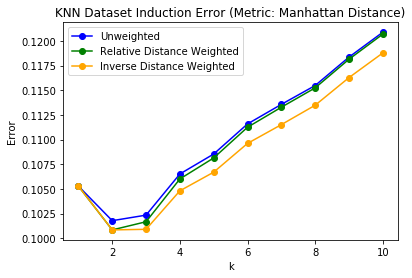

In [54]:
plt.plot('k', 'Unweighted', data=data, marker='o', color='blue')
plt.plot('k', 'Relative Distance Weighted', data=data, marker='o', color='green')
plt.plot('k', 'Inverse Distance Weighted', data=data, marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('KNN Dataset Induction Error (Metric: Manhattan Distance)')

In [55]:
ks = pd.DataFrame(data=list(range(1, 11)), columns=['k'])
data = pd.concat([ks, ], axis=1)

In [56]:
data = compute_knn_error('uniform', 'euclidean', data, 'Unweighted')
data = compute_knn_error(get_weights_kulah, 'euclidean', data, 'Relative Distance Weighted')
data = compute_knn_error('distance', 'euclidean', data, 'Inverse Distance Weighted')
print(data)

    k  Unweighted  Relative Distance Weighted  Inverse Distance Weighted
0   1    0.098832                    0.098832                   0.098832
1   2    0.091288                    0.090291                   0.090291
2   3    0.089152                    0.088494                   0.087760
3   4    0.087804                    0.087396                   0.086426
4   5    0.088316                    0.087998                   0.086836
5   6    0.089235                    0.088970                   0.087698
6   7    0.089333                    0.089121                   0.087817
7   8    0.090051                    0.089860                   0.088470
8   9    0.090308                    0.090150                   0.088776
9  10    0.090687                    0.090548                   0.089155


In [57]:
data.k[data.iloc[:, 1:].idxmin(axis=0)].values

array([4, 4, 4])

Text(0.5, 1.0, 'KNN Dataset Induction Error (Metric: Euclidean Distance)')

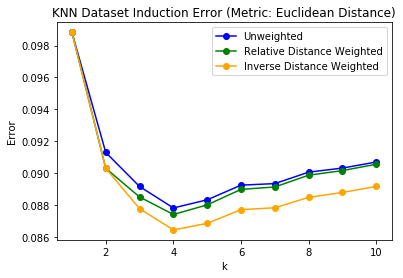

In [58]:
plt.plot('k', 'Unweighted', data=data, marker='o', color='blue')
plt.plot('k', 'Relative Distance Weighted', data=data, marker='o', color='green')
plt.plot('k', 'Inverse Distance Weighted', data=data, marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('KNN Dataset Induction Error (Metric: Euclidean Distance)')

In [59]:
ks = pd.DataFrame(data=list(range(1, 11)), columns=['k'])
data = pd.concat([ks, ], axis=1)

In [60]:
data = compute_knn_error('uniform', 'cosine', data, 'Unweighted')
data = compute_knn_error(get_weights_kulah, 'cosine', data, 'Relative Distance Weighted')
data = compute_knn_error('distance', 'cosine', data, 'Inverse Distance Weighted')
print(data)

    k  Unweighted  Relative Distance Weighted  Inverse Distance Weighted
0   1    0.098058                    0.098058                   0.098058
1   2    0.087117                    0.085610                   0.085610
2   3    0.085881                    0.084597                   0.083187
3   4    0.084343                    0.083614                   0.081715
4   5    0.083409                    0.082862                   0.080557
5   6    0.082961                    0.082544                   0.080113
6   7    0.082818                    0.082496                   0.079986
7   8    0.082927                    0.082646                   0.080106
8   9    0.083065                    0.082804                   0.080073
9  10    0.083420                    0.083184                   0.080330


In [61]:
data.k[data.iloc[:, 1:].idxmin(axis=0)].values

array([7, 7, 7])

Text(0.5, 1.0, 'KNN Dataset Induction Error (Metric: Cosine Distance)')

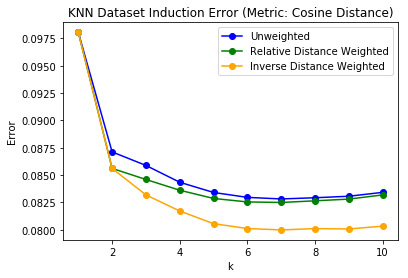

In [62]:
plt.plot('k', 'Unweighted', data=data, marker='o', color='blue')
plt.plot('k', 'Relative Distance Weighted', data=data, marker='o', color='green')
plt.plot('k', 'Inverse Distance Weighted', data=data, marker='o', color='orange')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('KNN Dataset Induction Error (Metric: Cosine Distance)')